In [2]:
import sys
sys.path.append("/Users/irisstone/Google Drive (istone@princeton.edu)/Princeton/Research/Striatum Towers Task/code/glmhmm")
import matplotlib.pyplot as plt
from glmhmm import glm
import time

In [3]:
# set the parameters of the GLM
N = 1000000 # number of data/time points
M = 6 # number of input features
C = 3 # number of observation classes

In [4]:
# make a GLM with these parameters and set distribution type
true_GLM = glm.GLM(N,M,C,observations="multinomial")
true_x,true_w,true_y = true_GLM.generate_data()
true_ll = true_GLM.neglogli(true_x,true_w,true_y) * -1

In [5]:
# fit model
w_init = true_GLM.init_weights()
t0 = time.time()
w, phi = true_GLM.fit(true_x,w_init,true_y)
print(time.time()-t0)
fit_ll = true_GLM.ll
fit_ll = true_GLM.neglogli(true_x,w,true_y) * -1

5.311612844467163


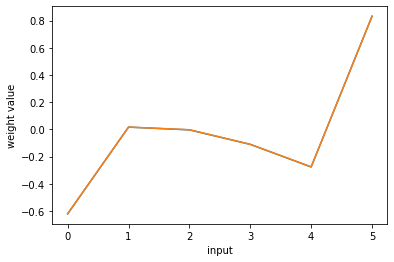

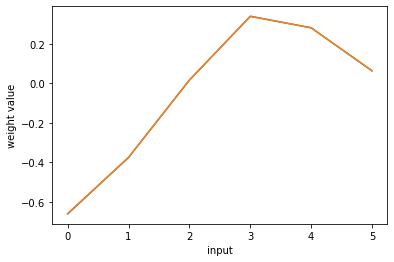

In [5]:
# plot weights
for i in range(1,C):
    plt.figure()
    plt.plot(true_w[:,i])
    plt.plot(w[:,i])
    plt.xlabel('input')
    plt.ylabel('weight value')

In [6]:
# compare loglikelihoods
print('True LL: %f' %(true_ll))
print('Fit LL: %f' %(fit_ll))

True LL: -311302.472106
Fit LL: -311297.410510


In [7]:
import numpy as np
np.round(w,2)

array([[ 0.  , -0.62, -0.66],
       [ 0.  ,  0.02, -0.37],
       [ 0.  , -0.  ,  0.02],
       [ 0.  , -0.11,  0.34],
       [ 0.  , -0.28,  0.28],
       [ 0.  ,  0.83,  0.06]])

In [8]:
np.round(true_w,2)

array([[ 0.  , -0.62, -0.66],
       [ 0.  ,  0.02, -0.38],
       [ 0.  , -0.  ,  0.02],
       [ 0.  , -0.11,  0.34],
       [ 0.  , -0.28,  0.28],
       [ 0.  ,  0.83,  0.06]])

In [9]:
true_GLM.neglogli(true_x,np.round(true_w,2),true_y) * -1

-311376.44045027177

In [10]:
true_GLM.neglogli(true_x,np.round(w,2),true_y) * -1

-311360.37484278885